In [1]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import swarm

In [3]:
def f(x):
    return x[:, 0]**2 + x[:, 1]**2

constraints = np.array([[1.0, 2.5],
                        [10.0, 7.6]])

sw = swarm.Swarm(f, 10, 2, constraints)

In [4]:
gbest, gbest_position = sw.compute_gbest()

In [5]:
lbest, lbest_position = sw.compute_lbest()

pbest = sw.pbest
pbest_position = sw.pbest_position

position = sw.position + sw.velocity
values = sw.func(position)


In [124]:
c_1, c_2 = np.ones(2)*0.5 + np.log(2)

In [125]:
c_1, c_2

(1.1931471805599454, 1.1931471805599454)

In [6]:
U_1 = np.random.uniform(0, 1, (sw.n_particles, sw.dim))
U_2 = np.random.uniform(0, 1, (sw.n_particles, sw.dim))

proj_pbest = position + c_1 * U_1 * (pbest_position - position)
proj_lbest = position + c_2 * U_2 * (lbest_position - position) 

G = (position + proj_pbest + proj_lbest) / 3

In [7]:
radius = np.linalg.norm(G - position, axis=1)
radius

array([0.12142343, 0.36222785, 0.31615796, 0.08703617, 0.16757266,
       0.61639775, 0.17922122, 0.21612037, 0.52099396, 0.31894797])

In [8]:
center = G

In [92]:
center

array([[0.62992   , 1.01807138],
       [0.97757265, 0.78375247],
       [0.72889884, 0.36943035],
       [0.62560857, 0.47756257],
       [0.50521762, 0.83816319],
       [1.02250322, 1.08133453],
       [1.07370084, 0.62274924],
       [0.45226636, 0.52793601],
       [0.81914488, 1.1221419 ],
       [1.51943754, 0.28895797]])

In [93]:
r = radius

In [94]:
phi_rand = 2*np.pi*np.random.uniform(0, 1, sw.n_particles)

In [95]:
r_rand = r*np.sqrt(np.random.uniform(0, 1, sw.n_particles))

In [96]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return np.stack((x,y), axis=-1)

In [97]:
update = pol2cart(r_rand, phi_rand)

In [98]:
new_point = center + update

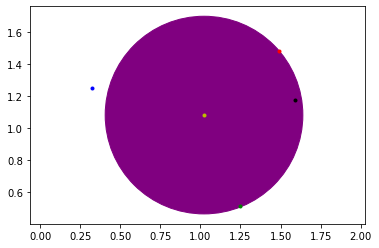

In [99]:
i=5
plt.plot(position[i, 0], position[i, 1], 'r.')
plt.plot(proj_pbest[i, 0], proj_pbest[i, 1], 'b.')
plt.plot(proj_lbest[i, 0], proj_lbest[i, 1], 'g.')
plt.plot(G[i, 0], G[i, 1], 'y.')
plt.plot(new_point[i, 0], new_point[i, 1], 'k.')

circle1 = plt.Circle(G[i, :] , radius[i], color='purple')
plt.gca().add_patch(circle1)

plt.axis('equal')
plt.show()

In [100]:
(sw.n_particles, sw.dim)

(10, 2)

In [102]:
u = np.random.normal(0, 1, (sw.n_particles, sw.dim+2))

In [104]:
dot= r[:,None]*u

In [106]:
norm = np.sqrt(np.sum(dot**2))

In [107]:
dot=dot/norm

In [109]:
update_2 = dot[:,:sw.dim]

In [110]:
new_point_2 = center + update_2

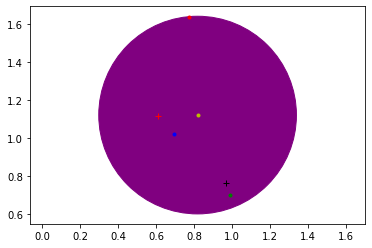

In [121]:
i=8
plt.plot(position[i, 0], position[i, 1], 'r.')
plt.plot(proj_pbest[i, 0], proj_pbest[i, 1], 'b.')
plt.plot(proj_lbest[i, 0], proj_lbest[i, 1], 'g.')
plt.plot(G[i, 0], G[i, 1], 'y.')
plt.plot(new_point[i, 0], new_point[i, 1], 'k+')
plt.plot(new_point_2[i, 0], new_point_2[i, 1], 'r+')

circle1 = plt.Circle(G[i, :] , radius[i], color='purple')
plt.gca().add_patch(circle1)

plt.axis('equal')
plt.show()